In [2]:
import numpy as np
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy
import matplotlib.pyplot as plt

In [3]:
X, y, c = [], [], [0,0,0,0]
for i in range(1000):
    if i%15==0:
        y.append( np.array([1, 0, 0, 0]) )
        c[0]+=1
    elif i%5==0: # and c[1]<=c[0]
        y.append( np.array([0, 1, 0, 0]) )
        c[1]+=1
    elif i%3==0: # and c[2]<=c[1]
        y.append( np.array([0, 0, 1, 0]) )
        c[2]+=1
    elif True: # and c[3]<c[2]
        y.append( np.array([0, 0, 0, 1]) )
        c[3]+=1
    else:
        continue
    X.append( [(i//2**(9-j))%2 for j in range(10)] )
X, y, n = np.array(X), np.array(y), len(X)
print(X.shape, y.shape, n, c)

(1000, 10) (1000, 4) 1000 [67, 133, 267, 533]


In [4]:
z = list(zip(X,y))
np.random.shuffle(z)
X, y = zip(*z)
X, y = np.array(X), np.array(y)

xTrain, yTrain = X[:int(0.8*n)], y[:int(0.8*n)]
xVal, yVal = X[int(0.8*n):], y[int(0.8*n):]
print(xTrain.shape, yTrain.shape, xVal.shape, yVal.shape)

(800, 10) (800, 4) (200, 10) (200, 4)


In [5]:
inputL = Input(shape=(10,))
x = Dense(64, activation='relu')(inputL)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(4, activation='softmax')(x)

model = Model(inputL, x)
model.compile(optimizer=Adam(lr=0.0001), loss=categorical_crossentropy, \
    metrics=[categorical_accuracy])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 516       
Total params: 9,540
Trainable params: 9,540
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(X, y, epochs=2000, validation_data=(xVal, yVal))


Train on 1000 samples, validate on 200 samples
Epoch 1/2000
1000/1000 [==============================] - 0s 134us/step - loss: 1.3750 - categorical_accuracy: 0.2730 - val_loss: 1.3316 - val_categorical_accuracy: 0.4050
Epoch 2/2000
1000/1000 [==============================] - 0s 40us/step - loss: 1.3134 - categorical_accuracy: 0.4020 - val_loss: 1.2750 - val_categorical_accuracy: 0.4900
Epoch 3/2000
1000/1000 [==============================] - 0s 32us/step - loss: 1.2605 - categorical_accuracy: 0.5040 - val_loss: 1.2303 - val_categorical_accuracy: 0.5400
Epoch 4/2000
1000/1000 [==============================] - 0s 31us/step - loss: 1.2222 - categorical_accuracy: 0.5220 - val_loss: 1.1955 - val_categorical_accuracy: 0.5450
Epoch 5/2000
1000/1000 [==============================] - 0s 32us/step - loss: 1.1981 - categorical_accuracy: 0.5300 - val_loss: 1.1720 - val_categorical_accuracy: 0.5450
Epoch 6/2000
1000/1000 [==============================] - 0s 34us/step - loss: 1.1857 - categori

Epoch 47/2000
1000/1000 [==============================] - 0s 30us/step - loss: 1.1359 - categorical_accuracy: 0.5330 - val_loss: 1.1021 - val_categorical_accuracy: 0.5450
Epoch 48/2000
1000/1000 [==============================] - 0s 29us/step - loss: 1.1334 - categorical_accuracy: 0.5330 - val_loss: 1.1022 - val_categorical_accuracy: 0.5450
Epoch 49/2000
1000/1000 [==============================] - 0s 29us/step - loss: 1.1269 - categorical_accuracy: 0.5340 - val_loss: 1.1015 - val_categorical_accuracy: 0.5450
Epoch 50/2000
1000/1000 [==============================] - 0s 29us/step - loss: 1.1360 - categorical_accuracy: 0.5320 - val_loss: 1.1015 - val_categorical_accuracy: 0.5450
Epoch 51/2000
1000/1000 [==============================] - 0s 30us/step - loss: 1.1343 - categorical_accuracy: 0.5320 - val_loss: 1.1009 - val_categorical_accuracy: 0.5450
Epoch 52/2000
1000/1000 [==============================] - 0s 29us/step - loss: 1.1339 - categorical_accuracy: 0.5330 - val_loss: 1.1007 - v

1000/1000 [==============================] - 0s 30us/step - loss: 1.1187 - categorical_accuracy: 0.5330 - val_loss: 1.0843 - val_categorical_accuracy: 0.5450
Epoch 95/2000
1000/1000 [==============================] - 0s 31us/step - loss: 1.1203 - categorical_accuracy: 0.5330 - val_loss: 1.0838 - val_categorical_accuracy: 0.5450
Epoch 96/2000
1000/1000 [==============================] - 0s 30us/step - loss: 1.1179 - categorical_accuracy: 0.5330 - val_loss: 1.0834 - val_categorical_accuracy: 0.5450
Epoch 97/2000
1000/1000 [==============================] - 0s 30us/step - loss: 1.1228 - categorical_accuracy: 0.5330 - val_loss: 1.0830 - val_categorical_accuracy: 0.5450
Epoch 98/2000
1000/1000 [==============================] - 0s 29us/step - loss: 1.1181 - categorical_accuracy: 0.5330 - val_loss: 1.0830 - val_categorical_accuracy: 0.5450
Epoch 99/2000
1000/1000 [==============================] - 0s 29us/step - loss: 1.1154 - categorical_accuracy: 0.5320 - val_loss: 1.0818 - val_categorical

1000/1000 [==============================] - 0s 30us/step - loss: 1.1016 - categorical_accuracy: 0.5350 - val_loss: 1.0620 - val_categorical_accuracy: 0.5450
Epoch 142/2000
1000/1000 [==============================] - 0s 30us/step - loss: 1.0956 - categorical_accuracy: 0.5340 - val_loss: 1.0616 - val_categorical_accuracy: 0.5450
Epoch 143/2000
1000/1000 [==============================] - 0s 29us/step - loss: 1.0963 - categorical_accuracy: 0.5340 - val_loss: 1.0609 - val_categorical_accuracy: 0.5450
Epoch 144/2000
1000/1000 [==============================] - 0s 31us/step - loss: 1.0962 - categorical_accuracy: 0.5330 - val_loss: 1.0604 - val_categorical_accuracy: 0.5450
Epoch 145/2000
1000/1000 [==============================] - 0s 31us/step - loss: 1.0926 - categorical_accuracy: 0.5340 - val_loss: 1.0598 - val_categorical_accuracy: 0.5450
Epoch 146/2000
1000/1000 [==============================] - 0s 30us/step - loss: 1.0971 - categorical_accuracy: 0.5340 - val_loss: 1.0594 - val_catego

1000/1000 [==============================] - 0s 29us/step - loss: 1.0764 - categorical_accuracy: 0.5350 - val_loss: 1.0309 - val_categorical_accuracy: 0.5450
Epoch 189/2000
1000/1000 [==============================] - 0s 31us/step - loss: 1.0701 - categorical_accuracy: 0.5370 - val_loss: 1.0298 - val_categorical_accuracy: 0.5450
Epoch 190/2000
1000/1000 [==============================] - 0s 30us/step - loss: 1.0681 - categorical_accuracy: 0.5350 - val_loss: 1.0287 - val_categorical_accuracy: 0.5450
Epoch 191/2000
1000/1000 [==============================] - 0s 30us/step - loss: 1.0667 - categorical_accuracy: 0.5350 - val_loss: 1.0282 - val_categorical_accuracy: 0.5450
Epoch 192/2000
1000/1000 [==============================] - 0s 29us/step - loss: 1.0705 - categorical_accuracy: 0.5370 - val_loss: 1.0274 - val_categorical_accuracy: 0.5450
Epoch 193/2000
1000/1000 [==============================] - 0s 31us/step - loss: 1.0602 - categorical_accuracy: 0.5330 - val_loss: 1.0259 - val_catego

1000/1000 [==============================] - 0s 29us/step - loss: 1.0118 - categorical_accuracy: 0.5510 - val_loss: 0.9790 - val_categorical_accuracy: 0.5500
Epoch 236/2000
1000/1000 [==============================] - 0s 31us/step - loss: 1.0215 - categorical_accuracy: 0.5390 - val_loss: 0.9779 - val_categorical_accuracy: 0.5500
Epoch 237/2000
1000/1000 [==============================] - 0s 31us/step - loss: 1.0150 - categorical_accuracy: 0.5480 - val_loss: 0.9771 - val_categorical_accuracy: 0.5500
Epoch 238/2000
1000/1000 [==============================] - 0s 31us/step - loss: 1.0147 - categorical_accuracy: 0.5470 - val_loss: 0.9753 - val_categorical_accuracy: 0.5500
Epoch 239/2000
1000/1000 [==============================] - 0s 31us/step - loss: 1.0225 - categorical_accuracy: 0.5460 - val_loss: 0.9743 - val_categorical_accuracy: 0.5550
Epoch 240/2000
1000/1000 [==============================] - 0s 30us/step - loss: 1.0058 - categorical_accuracy: 0.5480 - val_loss: 0.9732 - val_catego

1000/1000 [==============================] - 0s 29us/step - loss: 0.9539 - categorical_accuracy: 0.5870 - val_loss: 0.9082 - val_categorical_accuracy: 0.5850
Epoch 283/2000
1000/1000 [==============================] - 0s 29us/step - loss: 0.9522 - categorical_accuracy: 0.5790 - val_loss: 0.9079 - val_categorical_accuracy: 0.5900
Epoch 284/2000
1000/1000 [==============================] - 0s 29us/step - loss: 0.9522 - categorical_accuracy: 0.5930 - val_loss: 0.9051 - val_categorical_accuracy: 0.5950
Epoch 285/2000
1000/1000 [==============================] - 0s 30us/step - loss: 0.9496 - categorical_accuracy: 0.5860 - val_loss: 0.9044 - val_categorical_accuracy: 0.5900
Epoch 286/2000
1000/1000 [==============================] - 0s 29us/step - loss: 0.9457 - categorical_accuracy: 0.5860 - val_loss: 0.9026 - val_categorical_accuracy: 0.6000
Epoch 287/2000
1000/1000 [==============================] - 0s 28us/step - loss: 0.9447 - categorical_accuracy: 0.5970 - val_loss: 0.9015 - val_catego

1000/1000 [==============================] - 0s 30us/step - loss: 0.8712 - categorical_accuracy: 0.6490 - val_loss: 0.8283 - val_categorical_accuracy: 0.6450
Epoch 330/2000
1000/1000 [==============================] - 0s 32us/step - loss: 0.8742 - categorical_accuracy: 0.6440 - val_loss: 0.8266 - val_categorical_accuracy: 0.6500
Epoch 331/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.8820 - categorical_accuracy: 0.6450 - val_loss: 0.8254 - val_categorical_accuracy: 0.6400
Epoch 332/2000
1000/1000 [==============================] - 0s 31us/step - loss: 0.8670 - categorical_accuracy: 0.6430 - val_loss: 0.8232 - val_categorical_accuracy: 0.6550
Epoch 333/2000
1000/1000 [==============================] - 0s 30us/step - loss: 0.8702 - categorical_accuracy: 0.6560 - val_loss: 0.8210 - val_categorical_accuracy: 0.6500
Epoch 334/2000
1000/1000 [==============================] - 0s 29us/step - loss: 0.8672 - categorical_accuracy: 0.6540 - val_loss: 0.8180 - val_catego

1000/1000 [==============================] - 0s 31us/step - loss: 0.8024 - categorical_accuracy: 0.7080 - val_loss: 0.7396 - val_categorical_accuracy: 0.7200
Epoch 377/2000
1000/1000 [==============================] - 0s 31us/step - loss: 0.7871 - categorical_accuracy: 0.7160 - val_loss: 0.7388 - val_categorical_accuracy: 0.7150
Epoch 378/2000
1000/1000 [==============================] - 0s 29us/step - loss: 0.7894 - categorical_accuracy: 0.7000 - val_loss: 0.7366 - val_categorical_accuracy: 0.7300
Epoch 379/2000
1000/1000 [==============================] - 0s 28us/step - loss: 0.7977 - categorical_accuracy: 0.7110 - val_loss: 0.7349 - val_categorical_accuracy: 0.7250
Epoch 380/2000
1000/1000 [==============================] - 0s 29us/step - loss: 0.7793 - categorical_accuracy: 0.7070 - val_loss: 0.7326 - val_categorical_accuracy: 0.7250
Epoch 381/2000
1000/1000 [==============================] - 0s 28us/step - loss: 0.7917 - categorical_accuracy: 0.7070 - val_loss: 0.7306 - val_catego

1000/1000 [==============================] - 0s 31us/step - loss: 0.7290 - categorical_accuracy: 0.7470 - val_loss: 0.6541 - val_categorical_accuracy: 0.7950
Epoch 424/2000
1000/1000 [==============================] - 0s 32us/step - loss: 0.7080 - categorical_accuracy: 0.7630 - val_loss: 0.6528 - val_categorical_accuracy: 0.7950
Epoch 425/2000
1000/1000 [==============================] - 0s 30us/step - loss: 0.7083 - categorical_accuracy: 0.7610 - val_loss: 0.6500 - val_categorical_accuracy: 0.7900
Epoch 426/2000
1000/1000 [==============================] - 0s 29us/step - loss: 0.7058 - categorical_accuracy: 0.7600 - val_loss: 0.6475 - val_categorical_accuracy: 0.8000
Epoch 427/2000
1000/1000 [==============================] - 0s 29us/step - loss: 0.7123 - categorical_accuracy: 0.7600 - val_loss: 0.6451 - val_categorical_accuracy: 0.8000
Epoch 428/2000
1000/1000 [==============================] - 0s 29us/step - loss: 0.7096 - categorical_accuracy: 0.7560 - val_loss: 0.6446 - val_catego

1000/1000 [==============================] - 0s 31us/step - loss: 0.6408 - categorical_accuracy: 0.7910 - val_loss: 0.5717 - val_categorical_accuracy: 0.8350
Epoch 471/2000
1000/1000 [==============================] - 0s 30us/step - loss: 0.6527 - categorical_accuracy: 0.7700 - val_loss: 0.5693 - val_categorical_accuracy: 0.8300
Epoch 472/2000
1000/1000 [==============================] - 0s 29us/step - loss: 0.6481 - categorical_accuracy: 0.7830 - val_loss: 0.5679 - val_categorical_accuracy: 0.8350
Epoch 473/2000
1000/1000 [==============================] - 0s 30us/step - loss: 0.6328 - categorical_accuracy: 0.7820 - val_loss: 0.5655 - val_categorical_accuracy: 0.8400
Epoch 474/2000
1000/1000 [==============================] - 0s 30us/step - loss: 0.6365 - categorical_accuracy: 0.7970 - val_loss: 0.5639 - val_categorical_accuracy: 0.8400
Epoch 475/2000
1000/1000 [==============================] - 0s 30us/step - loss: 0.6355 - categorical_accuracy: 0.7810 - val_loss: 0.5617 - val_catego

1000/1000 [==============================] - 0s 30us/step - loss: 0.5636 - categorical_accuracy: 0.8190 - val_loss: 0.4934 - val_categorical_accuracy: 0.8750
Epoch 518/2000
1000/1000 [==============================] - 0s 30us/step - loss: 0.5686 - categorical_accuracy: 0.8190 - val_loss: 0.4918 - val_categorical_accuracy: 0.8750
Epoch 519/2000
1000/1000 [==============================] - 0s 29us/step - loss: 0.5745 - categorical_accuracy: 0.8190 - val_loss: 0.4908 - val_categorical_accuracy: 0.8750
Epoch 520/2000
1000/1000 [==============================] - 0s 31us/step - loss: 0.5604 - categorical_accuracy: 0.8260 - val_loss: 0.4900 - val_categorical_accuracy: 0.8750
Epoch 521/2000
1000/1000 [==============================] - 0s 29us/step - loss: 0.5679 - categorical_accuracy: 0.8150 - val_loss: 0.4881 - val_categorical_accuracy: 0.8700
Epoch 522/2000
1000/1000 [==============================] - 0s 29us/step - loss: 0.5573 - categorical_accuracy: 0.8340 - val_loss: 0.4863 - val_catego

1000/1000 [==============================] - 0s 28us/step - loss: 0.5081 - categorical_accuracy: 0.8390 - val_loss: 0.4253 - val_categorical_accuracy: 0.8950
Epoch 565/2000
1000/1000 [==============================] - 0s 30us/step - loss: 0.4999 - categorical_accuracy: 0.8480 - val_loss: 0.4239 - val_categorical_accuracy: 0.8950
Epoch 566/2000
1000/1000 [==============================] - 0s 30us/step - loss: 0.4938 - categorical_accuracy: 0.8500 - val_loss: 0.4218 - val_categorical_accuracy: 0.8950
Epoch 567/2000
1000/1000 [==============================] - 0s 30us/step - loss: 0.5068 - categorical_accuracy: 0.8400 - val_loss: 0.4203 - val_categorical_accuracy: 0.8850
Epoch 568/2000
1000/1000 [==============================] - 0s 29us/step - loss: 0.4866 - categorical_accuracy: 0.8480 - val_loss: 0.4180 - val_categorical_accuracy: 0.8900
Epoch 569/2000
1000/1000 [==============================] - 0s 28us/step - loss: 0.4795 - categorical_accuracy: 0.8630 - val_loss: 0.4171 - val_catego

1000/1000 [==============================] - 0s 28us/step - loss: 0.4354 - categorical_accuracy: 0.8750 - val_loss: 0.3623 - val_categorical_accuracy: 0.9150
Epoch 612/2000
1000/1000 [==============================] - 0s 28us/step - loss: 0.4345 - categorical_accuracy: 0.8710 - val_loss: 0.3602 - val_categorical_accuracy: 0.9050
Epoch 613/2000
1000/1000 [==============================] - 0s 28us/step - loss: 0.4383 - categorical_accuracy: 0.8770 - val_loss: 0.3585 - val_categorical_accuracy: 0.9050
Epoch 614/2000
1000/1000 [==============================] - 0s 15us/step - loss: 0.4162 - categorical_accuracy: 0.8760 - val_loss: 0.3565 - val_categorical_accuracy: 0.9100
Epoch 615/2000
1000/1000 [==============================] - 0s 46us/step - loss: 0.4280 - categorical_accuracy: 0.8700 - val_loss: 0.3554 - val_categorical_accuracy: 0.9050
Epoch 616/2000
1000/1000 [==============================] - 0s 28us/step - loss: 0.4413 - categorical_accuracy: 0.8610 - val_loss: 0.3545 - val_catego

1000/1000 [==============================] - 0s 36us/step - loss: 0.3788 - categorical_accuracy: 0.8900 - val_loss: 0.3067 - val_categorical_accuracy: 0.9250
Epoch 659/2000
1000/1000 [==============================] - 0s 36us/step - loss: 0.3825 - categorical_accuracy: 0.8790 - val_loss: 0.3070 - val_categorical_accuracy: 0.9250
Epoch 660/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.3673 - categorical_accuracy: 0.8920 - val_loss: 0.3047 - val_categorical_accuracy: 0.9250
Epoch 661/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.3787 - categorical_accuracy: 0.8970 - val_loss: 0.3041 - val_categorical_accuracy: 0.9250
Epoch 662/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.3693 - categorical_accuracy: 0.8920 - val_loss: 0.3036 - val_categorical_accuracy: 0.9200
Epoch 663/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.3827 - categorical_accuracy: 0.8890 - val_loss: 0.3017 - val_catego

1000/1000 [==============================] - 0s 34us/step - loss: 0.3358 - categorical_accuracy: 0.8980 - val_loss: 0.2630 - val_categorical_accuracy: 0.9500
Epoch 706/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.3541 - categorical_accuracy: 0.8840 - val_loss: 0.2617 - val_categorical_accuracy: 0.9500
Epoch 707/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.3325 - categorical_accuracy: 0.9010 - val_loss: 0.2610 - val_categorical_accuracy: 0.9500
Epoch 708/2000
1000/1000 [==============================] - 0s 36us/step - loss: 0.3284 - categorical_accuracy: 0.9040 - val_loss: 0.2602 - val_categorical_accuracy: 0.9500
Epoch 709/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.3287 - categorical_accuracy: 0.9140 - val_loss: 0.2594 - val_categorical_accuracy: 0.9500
Epoch 710/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.3272 - categorical_accuracy: 0.9090 - val_loss: 0.2572 - val_catego

1000/1000 [==============================] - 0s 36us/step - loss: 0.2985 - categorical_accuracy: 0.9160 - val_loss: 0.2257 - val_categorical_accuracy: 0.9550
Epoch 753/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.2925 - categorical_accuracy: 0.9140 - val_loss: 0.2250 - val_categorical_accuracy: 0.9550
Epoch 754/2000
1000/1000 [==============================] - 0s 32us/step - loss: 0.2866 - categorical_accuracy: 0.9220 - val_loss: 0.2238 - val_categorical_accuracy: 0.9550
Epoch 755/2000
1000/1000 [==============================] - 0s 32us/step - loss: 0.2887 - categorical_accuracy: 0.9270 - val_loss: 0.2234 - val_categorical_accuracy: 0.9550
Epoch 756/2000
1000/1000 [==============================] - 0s 32us/step - loss: 0.2823 - categorical_accuracy: 0.9200 - val_loss: 0.2224 - val_categorical_accuracy: 0.9550
Epoch 757/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.3014 - categorical_accuracy: 0.9110 - val_loss: 0.2223 - val_catego

1000/1000 [==============================] - 0s 33us/step - loss: 0.2560 - categorical_accuracy: 0.9250 - val_loss: 0.1944 - val_categorical_accuracy: 0.9600
Epoch 800/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.2668 - categorical_accuracy: 0.9290 - val_loss: 0.1932 - val_categorical_accuracy: 0.9600
Epoch 801/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.2637 - categorical_accuracy: 0.9190 - val_loss: 0.1952 - val_categorical_accuracy: 0.9600
Epoch 802/2000
1000/1000 [==============================] - 0s 32us/step - loss: 0.2623 - categorical_accuracy: 0.9210 - val_loss: 0.1943 - val_categorical_accuracy: 0.9600
Epoch 803/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.2649 - categorical_accuracy: 0.9200 - val_loss: 0.1926 - val_categorical_accuracy: 0.9600
Epoch 804/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.2471 - categorical_accuracy: 0.9310 - val_loss: 0.1923 - val_catego

1000/1000 [==============================] - 0s 34us/step - loss: 0.2171 - categorical_accuracy: 0.9450 - val_loss: 0.1661 - val_categorical_accuracy: 0.9600
Epoch 847/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.2233 - categorical_accuracy: 0.9420 - val_loss: 0.1656 - val_categorical_accuracy: 0.9600
Epoch 848/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.2489 - categorical_accuracy: 0.9260 - val_loss: 0.1662 - val_categorical_accuracy: 0.9600
Epoch 849/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.2209 - categorical_accuracy: 0.9340 - val_loss: 0.1656 - val_categorical_accuracy: 0.9600
Epoch 850/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.2291 - categorical_accuracy: 0.9310 - val_loss: 0.1659 - val_categorical_accuracy: 0.9600
Epoch 851/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.2321 - categorical_accuracy: 0.9320 - val_loss: 0.1657 - val_catego

1000/1000 [==============================] - 0s 36us/step - loss: 0.1933 - categorical_accuracy: 0.9490 - val_loss: 0.1441 - val_categorical_accuracy: 0.9600
Epoch 894/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.2171 - categorical_accuracy: 0.9450 - val_loss: 0.1440 - val_categorical_accuracy: 0.9650
Epoch 895/2000
1000/1000 [==============================] - 0s 36us/step - loss: 0.2065 - categorical_accuracy: 0.9430 - val_loss: 0.1449 - val_categorical_accuracy: 0.9700
Epoch 896/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.2093 - categorical_accuracy: 0.9410 - val_loss: 0.1437 - val_categorical_accuracy: 0.9750
Epoch 897/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.2124 - categorical_accuracy: 0.9320 - val_loss: 0.1439 - val_categorical_accuracy: 0.9650
Epoch 898/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.2087 - categorical_accuracy: 0.9470 - val_loss: 0.1440 - val_catego

1000/1000 [==============================] - 0s 34us/step - loss: 0.1875 - categorical_accuracy: 0.9470 - val_loss: 0.1240 - val_categorical_accuracy: 0.9750
Epoch 941/2000
1000/1000 [==============================] - 0s 36us/step - loss: 0.1988 - categorical_accuracy: 0.9450 - val_loss: 0.1242 - val_categorical_accuracy: 0.9750
Epoch 942/2000
1000/1000 [==============================] - 0s 39us/step - loss: 0.1872 - categorical_accuracy: 0.9470 - val_loss: 0.1229 - val_categorical_accuracy: 0.9750
Epoch 943/2000
1000/1000 [==============================] - 0s 38us/step - loss: 0.1769 - categorical_accuracy: 0.9580 - val_loss: 0.1223 - val_categorical_accuracy: 0.9750
Epoch 944/2000
1000/1000 [==============================] - 0s 39us/step - loss: 0.1759 - categorical_accuracy: 0.9540 - val_loss: 0.1214 - val_categorical_accuracy: 0.9750
Epoch 945/2000
1000/1000 [==============================] - 0s 43us/step - loss: 0.1856 - categorical_accuracy: 0.9440 - val_loss: 0.1213 - val_catego

1000/1000 [==============================] - 0s 33us/step - loss: 0.1512 - categorical_accuracy: 0.9630 - val_loss: 0.1088 - val_categorical_accuracy: 0.9800
Epoch 988/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.1637 - categorical_accuracy: 0.9550 - val_loss: 0.1077 - val_categorical_accuracy: 0.9800
Epoch 989/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.1681 - categorical_accuracy: 0.9560 - val_loss: 0.1071 - val_categorical_accuracy: 0.9800
Epoch 990/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.1665 - categorical_accuracy: 0.9470 - val_loss: 0.1068 - val_categorical_accuracy: 0.9800
Epoch 991/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.1673 - categorical_accuracy: 0.9590 - val_loss: 0.1068 - val_categorical_accuracy: 0.9800
Epoch 992/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.1686 - categorical_accuracy: 0.9510 - val_loss: 0.1062 - val_catego

1000/1000 [==============================] - 0s 34us/step - loss: 0.1475 - categorical_accuracy: 0.9600 - val_loss: 0.0933 - val_categorical_accuracy: 0.9800
Epoch 1035/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.1484 - categorical_accuracy: 0.9570 - val_loss: 0.0934 - val_categorical_accuracy: 0.9800
Epoch 1036/2000
1000/1000 [==============================] - 0s 32us/step - loss: 0.1486 - categorical_accuracy: 0.9590 - val_loss: 0.0924 - val_categorical_accuracy: 0.9850
Epoch 1037/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.1452 - categorical_accuracy: 0.9580 - val_loss: 0.0921 - val_categorical_accuracy: 0.9800
Epoch 1038/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.1489 - categorical_accuracy: 0.9640 - val_loss: 0.0928 - val_categorical_accuracy: 0.9800
Epoch 1039/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.1424 - categorical_accuracy: 0.9620 - val_loss: 0.0921 - val_c

1000/1000 [==============================] - 0s 34us/step - loss: 0.1374 - categorical_accuracy: 0.9630 - val_loss: 0.0812 - val_categorical_accuracy: 0.9850
Epoch 1082/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.1430 - categorical_accuracy: 0.9660 - val_loss: 0.0798 - val_categorical_accuracy: 0.9850
Epoch 1083/2000
1000/1000 [==============================] - 0s 32us/step - loss: 0.1350 - categorical_accuracy: 0.9640 - val_loss: 0.0801 - val_categorical_accuracy: 0.9850
Epoch 1084/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.1334 - categorical_accuracy: 0.9630 - val_loss: 0.0800 - val_categorical_accuracy: 0.9850
Epoch 1085/2000
1000/1000 [==============================] - 0s 41us/step - loss: 0.1278 - categorical_accuracy: 0.9740 - val_loss: 0.0800 - val_categorical_accuracy: 0.9850
Epoch 1086/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.1238 - categorical_accuracy: 0.9710 - val_loss: 0.0798 - val_c

1000/1000 [==============================] - 0s 34us/step - loss: 0.1169 - categorical_accuracy: 0.9720 - val_loss: 0.0699 - val_categorical_accuracy: 0.9850
Epoch 1129/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.1329 - categorical_accuracy: 0.9590 - val_loss: 0.0708 - val_categorical_accuracy: 0.9850
Epoch 1130/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.1170 - categorical_accuracy: 0.9690 - val_loss: 0.0714 - val_categorical_accuracy: 0.9850
Epoch 1131/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.1096 - categorical_accuracy: 0.9720 - val_loss: 0.0702 - val_categorical_accuracy: 0.9850
Epoch 1132/2000
1000/1000 [==============================] - 0s 32us/step - loss: 0.1113 - categorical_accuracy: 0.9700 - val_loss: 0.0704 - val_categorical_accuracy: 0.9850
Epoch 1133/2000
1000/1000 [==============================] - 0s 32us/step - loss: 0.1206 - categorical_accuracy: 0.9650 - val_loss: 0.0713 - val_c

1000/1000 [==============================] - 0s 34us/step - loss: 0.1057 - categorical_accuracy: 0.9720 - val_loss: 0.0612 - val_categorical_accuracy: 0.9850
Epoch 1176/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.1117 - categorical_accuracy: 0.9680 - val_loss: 0.0616 - val_categorical_accuracy: 0.9900
Epoch 1177/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.1116 - categorical_accuracy: 0.9670 - val_loss: 0.0620 - val_categorical_accuracy: 0.9900
Epoch 1178/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0998 - categorical_accuracy: 0.9780 - val_loss: 0.0609 - val_categorical_accuracy: 0.9850
Epoch 1179/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.1062 - categorical_accuracy: 0.9730 - val_loss: 0.0603 - val_categorical_accuracy: 0.9850
Epoch 1180/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.1113 - categorical_accuracy: 0.9740 - val_loss: 0.0603 - val_c

1000/1000 [==============================] - 0s 34us/step - loss: 0.0942 - categorical_accuracy: 0.9780 - val_loss: 0.0542 - val_categorical_accuracy: 0.9900
Epoch 1223/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0952 - categorical_accuracy: 0.9790 - val_loss: 0.0535 - val_categorical_accuracy: 0.9900
Epoch 1224/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0960 - categorical_accuracy: 0.9780 - val_loss: 0.0534 - val_categorical_accuracy: 0.9900
Epoch 1225/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.0974 - categorical_accuracy: 0.9780 - val_loss: 0.0527 - val_categorical_accuracy: 0.9900
Epoch 1226/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.0876 - categorical_accuracy: 0.9790 - val_loss: 0.0522 - val_categorical_accuracy: 0.9900
Epoch 1227/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.0939 - categorical_accuracy: 0.9740 - val_loss: 0.0525 - val_c

1000/1000 [==============================] - 0s 34us/step - loss: 0.0910 - categorical_accuracy: 0.9780 - val_loss: 0.0466 - val_categorical_accuracy: 0.9900
Epoch 1270/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0870 - categorical_accuracy: 0.9760 - val_loss: 0.0461 - val_categorical_accuracy: 0.9900
Epoch 1271/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0887 - categorical_accuracy: 0.9750 - val_loss: 0.0462 - val_categorical_accuracy: 0.9900
Epoch 1272/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.0921 - categorical_accuracy: 0.9760 - val_loss: 0.0458 - val_categorical_accuracy: 0.9900
Epoch 1273/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.1003 - categorical_accuracy: 0.9700 - val_loss: 0.0461 - val_categorical_accuracy: 0.9900
Epoch 1274/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0904 - categorical_accuracy: 0.9770 - val_loss: 0.0451 - val_c

Epoch 1316/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0784 - categorical_accuracy: 0.9820 - val_loss: 0.0402 - val_categorical_accuracy: 0.9950
Epoch 1317/2000
1000/1000 [==============================] - 0s 36us/step - loss: 0.0788 - categorical_accuracy: 0.9820 - val_loss: 0.0405 - val_categorical_accuracy: 0.9900
Epoch 1318/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0835 - categorical_accuracy: 0.9760 - val_loss: 0.0415 - val_categorical_accuracy: 0.9900
Epoch 1319/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.0820 - categorical_accuracy: 0.9830 - val_loss: 0.0405 - val_categorical_accuracy: 0.9900
Epoch 1320/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.0766 - categorical_accuracy: 0.9840 - val_loss: 0.0400 - val_categorical_accuracy: 0.9950
Epoch 1321/2000
1000/1000 [==============================] - 0s 32us/step - loss: 0.0768 - categorical_accuracy: 0.9820 - val_loss

1000/1000 [==============================] - 0s 34us/step - loss: 0.0746 - categorical_accuracy: 0.9810 - val_loss: 0.0355 - val_categorical_accuracy: 0.9950
Epoch 1364/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0761 - categorical_accuracy: 0.9830 - val_loss: 0.0356 - val_categorical_accuracy: 1.0000
Epoch 1365/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0737 - categorical_accuracy: 0.9860 - val_loss: 0.0358 - val_categorical_accuracy: 0.9950
Epoch 1366/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.0794 - categorical_accuracy: 0.9770 - val_loss: 0.0364 - val_categorical_accuracy: 0.9900
Epoch 1367/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0653 - categorical_accuracy: 0.9900 - val_loss: 0.0351 - val_categorical_accuracy: 0.9950
Epoch 1368/2000
1000/1000 [==============================] - 0s 36us/step - loss: 0.0734 - categorical_accuracy: 0.9820 - val_loss: 0.0347 - val_c

1000/1000 [==============================] - 0s 34us/step - loss: 0.0630 - categorical_accuracy: 0.9840 - val_loss: 0.0306 - val_categorical_accuracy: 0.9950
Epoch 1411/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0657 - categorical_accuracy: 0.9850 - val_loss: 0.0304 - val_categorical_accuracy: 1.0000
Epoch 1412/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0675 - categorical_accuracy: 0.9780 - val_loss: 0.0304 - val_categorical_accuracy: 1.0000
Epoch 1413/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0672 - categorical_accuracy: 0.9850 - val_loss: 0.0307 - val_categorical_accuracy: 1.0000
Epoch 1414/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0744 - categorical_accuracy: 0.9800 - val_loss: 0.0312 - val_categorical_accuracy: 0.9950
Epoch 1415/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0619 - categorical_accuracy: 0.9870 - val_loss: 0.0299 - val_c

1000/1000 [==============================] - 0s 34us/step - loss: 0.0624 - categorical_accuracy: 0.9850 - val_loss: 0.0266 - val_categorical_accuracy: 1.0000
Epoch 1458/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0641 - categorical_accuracy: 0.9840 - val_loss: 0.0268 - val_categorical_accuracy: 0.9950
Epoch 1459/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0637 - categorical_accuracy: 0.9850 - val_loss: 0.0267 - val_categorical_accuracy: 0.9950
Epoch 1460/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0549 - categorical_accuracy: 0.9860 - val_loss: 0.0261 - val_categorical_accuracy: 1.0000
Epoch 1461/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0551 - categorical_accuracy: 0.9880 - val_loss: 0.0268 - val_categorical_accuracy: 0.9950
Epoch 1462/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0519 - categorical_accuracy: 0.9900 - val_loss: 0.0265 - val_c

1000/1000 [==============================] - 0s 36us/step - loss: 0.0528 - categorical_accuracy: 0.9870 - val_loss: 0.0241 - val_categorical_accuracy: 1.0000
Epoch 1505/2000
1000/1000 [==============================] - 0s 36us/step - loss: 0.0542 - categorical_accuracy: 0.9920 - val_loss: 0.0241 - val_categorical_accuracy: 1.0000
Epoch 1506/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0601 - categorical_accuracy: 0.9840 - val_loss: 0.0245 - val_categorical_accuracy: 0.9950
Epoch 1507/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0517 - categorical_accuracy: 0.9900 - val_loss: 0.0238 - val_categorical_accuracy: 0.9950
Epoch 1508/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0639 - categorical_accuracy: 0.9850 - val_loss: 0.0232 - val_categorical_accuracy: 1.0000
Epoch 1509/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0532 - categorical_accuracy: 0.9920 - val_loss: 0.0235 - val_c

1000/1000 [==============================] - 0s 43us/step - loss: 0.0481 - categorical_accuracy: 0.9900 - val_loss: 0.0221 - val_categorical_accuracy: 1.0000
Epoch 1552/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0475 - categorical_accuracy: 0.9900 - val_loss: 0.0217 - val_categorical_accuracy: 1.0000
Epoch 1553/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0518 - categorical_accuracy: 0.9860 - val_loss: 0.0218 - val_categorical_accuracy: 0.9950
Epoch 1554/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0490 - categorical_accuracy: 0.9890 - val_loss: 0.0217 - val_categorical_accuracy: 0.9950
Epoch 1555/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0452 - categorical_accuracy: 0.9940 - val_loss: 0.0212 - val_categorical_accuracy: 0.9950
Epoch 1556/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.0441 - categorical_accuracy: 0.9920 - val_loss: 0.0211 - val_c

1000/1000 [==============================] - 0s 33us/step - loss: 0.0424 - categorical_accuracy: 0.9920 - val_loss: 0.0193 - val_categorical_accuracy: 1.0000
Epoch 1599/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0471 - categorical_accuracy: 0.9890 - val_loss: 0.0193 - val_categorical_accuracy: 1.0000
Epoch 1600/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.0463 - categorical_accuracy: 0.9900 - val_loss: 0.0195 - val_categorical_accuracy: 1.0000
Epoch 1601/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.0431 - categorical_accuracy: 0.9890 - val_loss: 0.0187 - val_categorical_accuracy: 1.0000
Epoch 1602/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0488 - categorical_accuracy: 0.9850 - val_loss: 0.0190 - val_categorical_accuracy: 1.0000
Epoch 1603/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.0449 - categorical_accuracy: 0.9870 - val_loss: 0.0199 - val_c

1000/1000 [==============================] - 0s 35us/step - loss: 0.0358 - categorical_accuracy: 0.9940 - val_loss: 0.0172 - val_categorical_accuracy: 1.0000
Epoch 1646/2000
1000/1000 [==============================] - 0s 36us/step - loss: 0.0422 - categorical_accuracy: 0.9900 - val_loss: 0.0171 - val_categorical_accuracy: 1.0000
Epoch 1647/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0374 - categorical_accuracy: 0.9920 - val_loss: 0.0167 - val_categorical_accuracy: 1.0000
Epoch 1648/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0458 - categorical_accuracy: 0.9870 - val_loss: 0.0170 - val_categorical_accuracy: 1.0000
Epoch 1649/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0414 - categorical_accuracy: 0.9930 - val_loss: 0.0165 - val_categorical_accuracy: 1.0000
Epoch 1650/2000
1000/1000 [==============================] - 0s 36us/step - loss: 0.0392 - categorical_accuracy: 0.9910 - val_loss: 0.0164 - val_c

1000/1000 [==============================] - 0s 35us/step - loss: 0.0316 - categorical_accuracy: 0.9980 - val_loss: 0.0153 - val_categorical_accuracy: 1.0000
Epoch 1693/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0384 - categorical_accuracy: 0.9910 - val_loss: 0.0144 - val_categorical_accuracy: 1.0000
Epoch 1694/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0382 - categorical_accuracy: 0.9910 - val_loss: 0.0144 - val_categorical_accuracy: 1.0000
Epoch 1695/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0353 - categorical_accuracy: 0.9890 - val_loss: 0.0146 - val_categorical_accuracy: 1.0000
Epoch 1696/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0362 - categorical_accuracy: 0.9910 - val_loss: 0.0147 - val_categorical_accuracy: 1.0000
Epoch 1697/2000
1000/1000 [==============================] - ETA: 0s - loss: 0.0230 - categorical_accuracy: 1.00 - 0s 35us/step - loss: 0.0387 - c

Epoch 1739/2000
1000/1000 [==============================] - 0s 36us/step - loss: 0.0312 - categorical_accuracy: 0.9940 - val_loss: 0.0128 - val_categorical_accuracy: 1.0000
Epoch 1740/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0342 - categorical_accuracy: 0.9940 - val_loss: 0.0129 - val_categorical_accuracy: 1.0000
Epoch 1741/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.0278 - categorical_accuracy: 0.9960 - val_loss: 0.0129 - val_categorical_accuracy: 1.0000
Epoch 1742/2000
1000/1000 [==============================] - 0s 32us/step - loss: 0.0283 - categorical_accuracy: 0.9970 - val_loss: 0.0128 - val_categorical_accuracy: 1.0000
Epoch 1743/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0320 - categorical_accuracy: 0.9950 - val_loss: 0.0131 - val_categorical_accuracy: 1.0000
Epoch 1744/2000
1000/1000 [==============================] - 0s 36us/step - loss: 0.0273 - categorical_accuracy: 1.0000 - val_loss

1000/1000 [==============================] - 0s 33us/step - loss: 0.0310 - categorical_accuracy: 0.9930 - val_loss: 0.0114 - val_categorical_accuracy: 1.0000
Epoch 1787/2000
1000/1000 [==============================] - 0s 36us/step - loss: 0.0345 - categorical_accuracy: 0.9930 - val_loss: 0.0112 - val_categorical_accuracy: 1.0000
Epoch 1788/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.0290 - categorical_accuracy: 0.9950 - val_loss: 0.0113 - val_categorical_accuracy: 1.0000
Epoch 1789/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.0327 - categorical_accuracy: 0.9930 - val_loss: 0.0116 - val_categorical_accuracy: 1.0000
Epoch 1790/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0316 - categorical_accuracy: 0.9950 - val_loss: 0.0113 - val_categorical_accuracy: 1.0000
Epoch 1791/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0313 - categorical_accuracy: 0.9930 - val_loss: 0.0113 - val_c

1000/1000 [==============================] - 0s 33us/step - loss: 0.0323 - categorical_accuracy: 0.9930 - val_loss: 0.0100 - val_categorical_accuracy: 1.0000
Epoch 1834/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.0340 - categorical_accuracy: 0.9920 - val_loss: 0.0119 - val_categorical_accuracy: 1.0000
Epoch 1835/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.0331 - categorical_accuracy: 0.9920 - val_loss: 0.0101 - val_categorical_accuracy: 1.0000
Epoch 1836/2000
1000/1000 [==============================] - 0s 32us/step - loss: 0.0297 - categorical_accuracy: 0.9950 - val_loss: 0.0101 - val_categorical_accuracy: 1.0000
Epoch 1837/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0298 - categorical_accuracy: 0.9950 - val_loss: 0.0100 - val_categorical_accuracy: 1.0000
Epoch 1838/2000
1000/1000 [==============================] - 0s 32us/step - loss: 0.0246 - categorical_accuracy: 0.9970 - val_loss: 0.0101 - val_c

Epoch 1880/2000
1000/1000 [==============================] - 0s 36us/step - loss: 0.0233 - categorical_accuracy: 0.9970 - val_loss: 0.0091 - val_categorical_accuracy: 1.0000
Epoch 1881/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0233 - categorical_accuracy: 0.9960 - val_loss: 0.0097 - val_categorical_accuracy: 1.0000
Epoch 1882/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0327 - categorical_accuracy: 0.9890 - val_loss: 0.0092 - val_categorical_accuracy: 1.0000
Epoch 1883/2000
1000/1000 [==============================] - 0s 33us/step - loss: 0.0272 - categorical_accuracy: 0.9960 - val_loss: 0.0096 - val_categorical_accuracy: 1.0000
Epoch 1884/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0263 - categorical_accuracy: 0.9960 - val_loss: 0.0093 - val_categorical_accuracy: 1.0000
Epoch 1885/2000
1000/1000 [==============================] - 0s 37us/step - loss: 0.0296 - categorical_accuracy: 0.9940 - val_loss

1000/1000 [==============================] - 0s 34us/step - loss: 0.0256 - categorical_accuracy: 0.9950 - val_loss: 0.0077 - val_categorical_accuracy: 1.0000
Epoch 1928/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0280 - categorical_accuracy: 0.9930 - val_loss: 0.0077 - val_categorical_accuracy: 1.0000
Epoch 1929/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0284 - categorical_accuracy: 0.9950 - val_loss: 0.0079 - val_categorical_accuracy: 1.0000
Epoch 1930/2000
1000/1000 [==============================] - 0s 36us/step - loss: 0.0198 - categorical_accuracy: 0.9980 - val_loss: 0.0076 - val_categorical_accuracy: 1.0000
Epoch 1931/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0250 - categorical_accuracy: 0.9920 - val_loss: 0.0084 - val_categorical_accuracy: 1.0000
Epoch 1932/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0237 - categorical_accuracy: 0.9990 - val_loss: 0.0080 - val_c

Epoch 1974/2000
1000/1000 [==============================] - 0s 37us/step - loss: 0.0229 - categorical_accuracy: 0.9970 - val_loss: 0.0071 - val_categorical_accuracy: 1.0000
Epoch 1975/2000
1000/1000 [==============================] - 0s 36us/step - loss: 0.0187 - categorical_accuracy: 0.9970 - val_loss: 0.0074 - val_categorical_accuracy: 1.0000
Epoch 1976/2000
1000/1000 [==============================] - 0s 35us/step - loss: 0.0196 - categorical_accuracy: 0.9980 - val_loss: 0.0071 - val_categorical_accuracy: 1.0000
Epoch 1977/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0210 - categorical_accuracy: 0.9970 - val_loss: 0.0071 - val_categorical_accuracy: 1.0000
Epoch 1978/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0238 - categorical_accuracy: 0.9950 - val_loss: 0.0069 - val_categorical_accuracy: 1.0000
Epoch 1979/2000
1000/1000 [==============================] - 0s 34us/step - loss: 0.0208 - categorical_accuracy: 0.9970 - val_loss

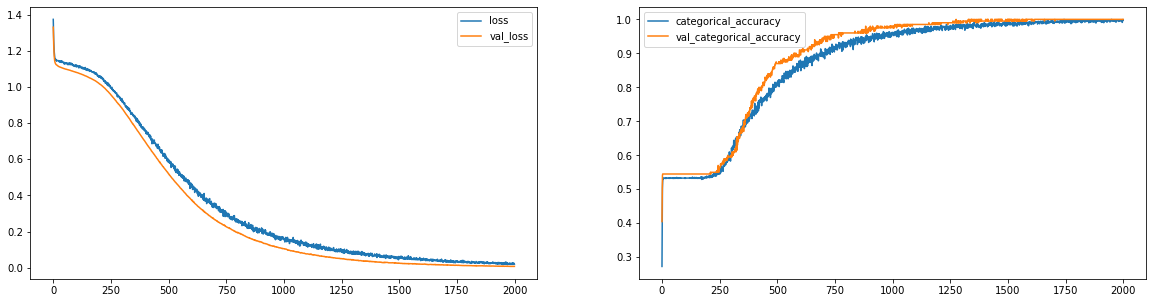

In [7]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(labels=['loss', 'val_loss'])
plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(labels=['categorical_accuracy', 'val_categorical_accuracy'])
plt.show()

In [8]:
pred, correct, error = model.predict(X), 0, 0
for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(y[i]):
        print(i, "correct")
        correct +=1
    else:
        print(i, "X")
        error += 1
print("correct={}, error={}".format(correct,error) )

0 correct
1 correct
2 correct
3 correct
4 correct
5 correct
6 correct
7 correct
8 correct
9 correct
10 correct
11 correct
12 correct
13 correct
14 correct
15 correct
16 correct
17 correct
18 correct
19 correct
20 correct
21 correct
22 correct
23 correct
24 correct
25 correct
26 correct
27 correct
28 correct
29 correct
30 correct
31 correct
32 correct
33 correct
34 correct
35 correct
36 correct
37 correct
38 correct
39 correct
40 correct
41 correct
42 correct
43 correct
44 correct
45 correct
46 correct
47 correct
48 correct
49 correct
50 correct
51 correct
52 correct
53 correct
54 correct
55 correct
56 correct
57 correct
58 correct
59 correct
60 correct
61 correct
62 correct
63 correct
64 correct
65 correct
66 correct
67 correct
68 correct
69 correct
70 correct
71 correct
72 correct
73 correct
74 correct
75 correct
76 correct
77 correct
78 correct
79 correct
80 correct
81 correct
82 correct
83 correct
84 correct
85 correct
86 correct
87 correct
88 correct
89 correct
90 correct
91 correc